
# Customer Behavior Analysis

## Objective
This project analyzes customer transaction data to uncover:

- Business performance (Revenue, Transactions, Customers)
- Product and market performance
- Customer purchasing behavior
- Distribution analysis
- Strategic insights for decision-making

Dataset used: `customer_transactions_processed.csv`


## 1️⃣ Import Libraries

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8,5)


## 2️⃣ Load Dataset

In [3]:

df = pd.read_csv("customer_transactions_processed.csv")
df.head()


,TransactionID,CustomerID,TransactionDate,ProductCategory,Quantity,UnitPrice,PaymentMethod,Country,TotalAmount
0,100000,1860,2023-11-22,Clothing,5,1664.10,Cash,USA,8320.50
1,100001,4772,2023-12-23,Electronics,5,3535.13,Cash,Canada,17675.65
2,100002,4092,2023-12-31,Clothing,4,3199.39,Credit Card,Canada,12797.56
3,100003,1466,2023-07-18,Beauty,3,2360.34,Debit Card,Canada,7081.02
4,100004,5426,2023-08-29,Sports,5,4004.66,Credit Card,India,20023.30


## 3️⃣ Data Overview

In [4]:

df.shape


(50000, 9)

In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    50000 non-null  int64  
 1   CustomerID       50000 non-null  int64  
 2   TransactionDate  50000 non-null  object 
 3   ProductCategory  50000 non-null  object 
 4   Quantity         50000 non-null  int64  
 5   UnitPrice        50000 non-null  float64
 6   PaymentMethod    50000 non-null  object 
 7   Country          50000 non-null  object 
 8   TotalAmount      50000 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 3.4+ MB


In [6]:

df.isnull().sum()


TransactionID      0
CustomerID         0
TransactionDate    0
ProductCategory    0
Quantity           0
UnitPrice          0
PaymentMethod      0
Country            0
TotalAmount        0
dtype: int64


### Insight:
The dataset contains transaction-level data including customer, product category, geography, and monetary values, making it suitable for behavioral and revenue analysis.


## 4️⃣ Data Cleaning & Preparation

In [7]:

df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df['TotalAmount'] = pd.to_numeric(df['TotalAmount'], errors='coerce')

df.dropna(inplace=True)
df.head()


,TransactionID,CustomerID,TransactionDate,ProductCategory,Quantity,UnitPrice,PaymentMethod,Country,TotalAmount
0,100000,1860,2023-11-22,Clothing,5,1664.10,Cash,USA,8320.50
1,100001,4772,2023-12-23,Electronics,5,3535.13,Cash,Canada,17675.65
2,100002,4092,2023-12-31,Clothing,4,3199.39,Credit Card,Canada,12797.56
3,100003,1466,2023-07-18,Beauty,3,2360.34,Debit Card,Canada,7081.02
4,100004,5426,2023-08-29,Sports,5,4004.66,Credit Card,India,20023.30



### Cleaning Steps Performed:
- Converted date column to datetime format
- Ensured numeric columns are properly typed
- Removed missing values to prevent aggregation errors


## 5️⃣ Key Performance Indicators (KPIs)

In [8]:

total_revenue = df['TotalAmount'].sum()
total_transactions = df['TransactionID'].nunique()
total_customers = df['CustomerID'].nunique()
avg_order_value = total_revenue / total_transactions

total_revenue, total_transactions, total_customers, avg_order_value


(np.float64(379515922.20000005), 50000, 5000, np.float64(7590.318444000001))


### Insight:
These KPIs provide a high-level view of overall business performance and purchasing efficiency.


## 6️⃣ Monthly Revenue Trend

C:\Users\himan\AppData\Local\Temp\ipykernel_3460\665136743.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='TransactionDate', freq='M'))['TotalAmount'].sum()


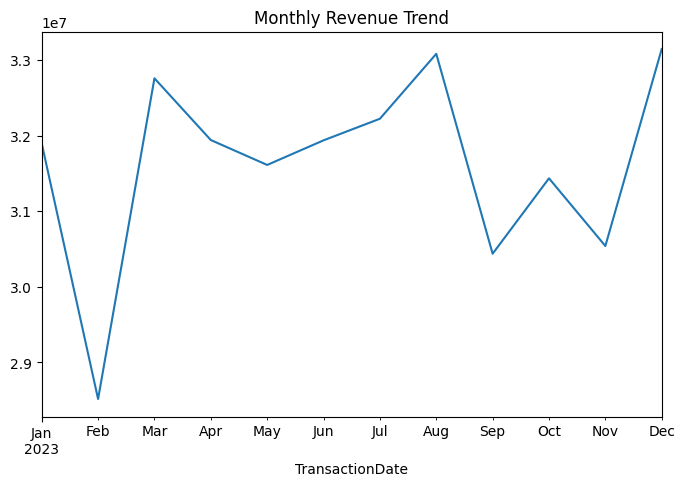

In [9]:

monthly = df.groupby(pd.Grouper(key='TransactionDate', freq='M'))['TotalAmount'].sum()

monthly.plot()
plt.title("Monthly Revenue Trend")
plt.show()



### Insight:
Helps identify seasonality and growth patterns over time.


## 7️⃣ Revenue by Product Category

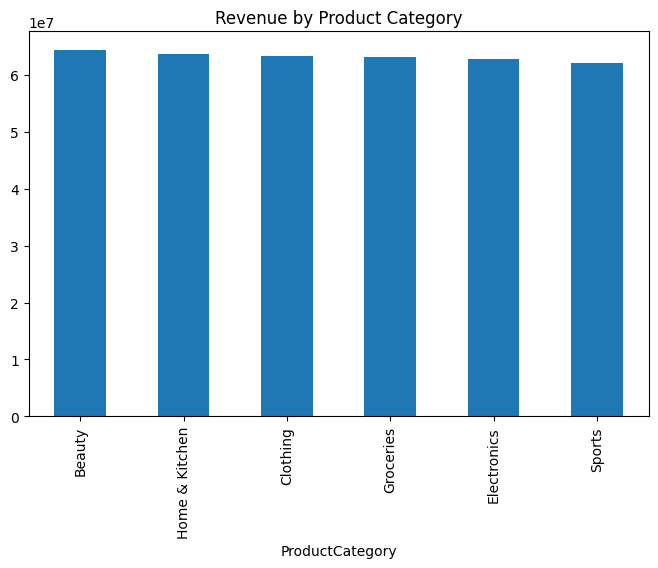

ProductCategory
Beauty            64415964.81
Home & Kitchen    63569531.21
Clothing          63300360.78
Groceries         63214117.63
Electronics       62865170.04
Sports            62150777.73
Name: TotalAmount, dtype: float64

In [10]:

category_rev = df.groupby('ProductCategory')['TotalAmount'].sum().sort_values(ascending=False)

category_rev.plot(kind='bar')
plt.title("Revenue by Product Category")
plt.show()

category_rev



### Insight:
Shows which product segments drive the majority of revenue.


## 8️⃣ Revenue by Country

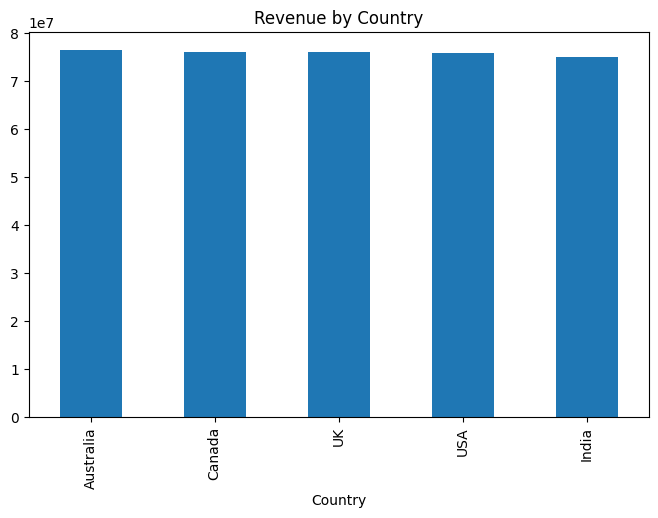

Country
Australia    76433463.94
Canada       76129968.38
UK           76090969.99
USA          75813987.73
India        75047532.16
Name: TotalAmount, dtype: float64

In [11]:

country_rev = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

country_rev.plot(kind='bar')
plt.title("Revenue by Country")
plt.show()

country_rev



### Insight:
Identifies key geographic markets contributing to overall revenue.


## 9️⃣ Top 10 Customers

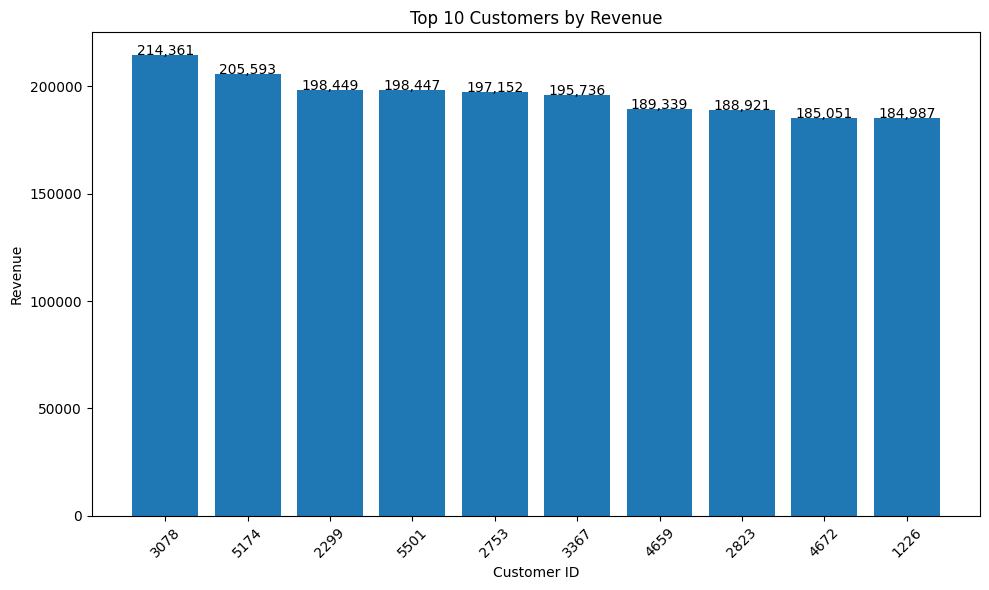

In [25]:

top_customers = (
    df.groupby('CustomerID')['TotalAmount']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Convert index to string
top_customers.index = top_customers.index.astype(str)

plt.figure(figsize=(10,6))

plt.bar(top_customers.index, top_customers.values)

plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Revenue")

# Rotate labels for readability
plt.xticks(rotation=45)

# Add revenue labels above bars
for i, v in enumerate(top_customers.values):
    plt.text(i, v, f"{v:,.0f}", ha='center')

plt.tight_layout()
plt.show()



### Insight:
Revenue is often concentrated among top customers, indicating potential VIP segments.


## 🔟 Customer Purchase Frequency

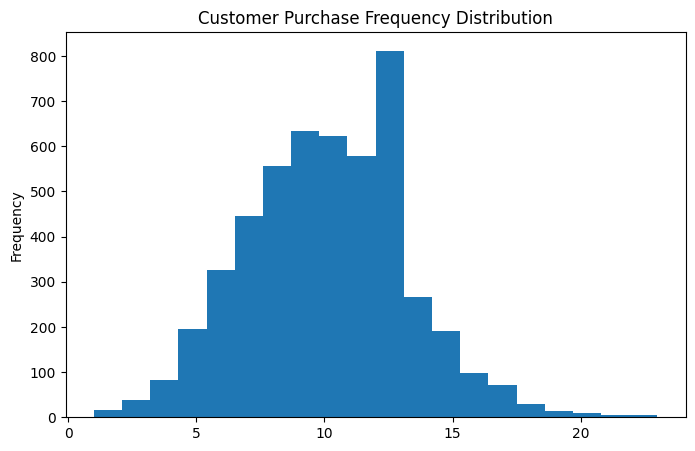

count    5000.000000
mean       10.000000
std         3.165502
min         1.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        23.000000
Name: TransactionID, dtype: float64

In [13]:

customer_freq = df.groupby('CustomerID')['TransactionID'].count()

customer_freq.plot(kind='hist', bins=20)
plt.title("Customer Purchase Frequency Distribution")
plt.show()

customer_freq.describe()



### Insight:
Most customers typically purchase a small number of times, while a few customers purchase frequently.


## 1️⃣1️⃣ Revenue Distribution

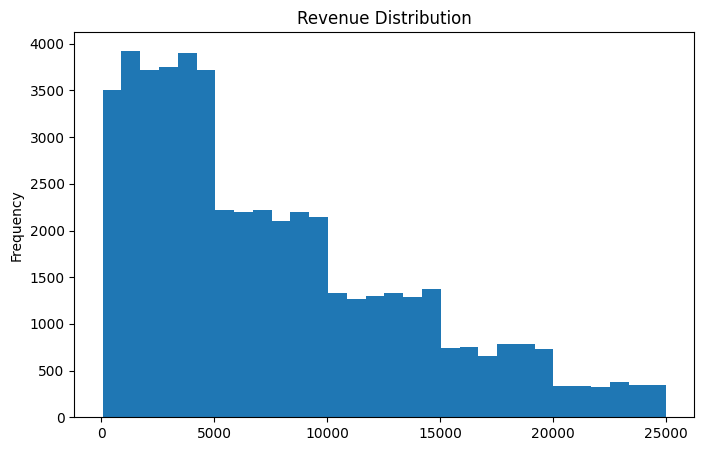

count    50000.000000
mean      7590.318444
std       5938.578684
min         50.020000
25%       2846.367500
50%       5970.955000
75%      11226.740000
max      24999.450000
Name: TotalAmount, dtype: float64

In [14]:

df['TotalAmount'].plot(kind='hist', bins=30)
plt.title("Revenue Distribution")
plt.show()

df['TotalAmount'].describe()



### Insight:
Revenue distribution is often right-skewed, meaning a small number of large transactions impact total revenue significantly.


## 1️⃣2️⃣ Quantity Distribution

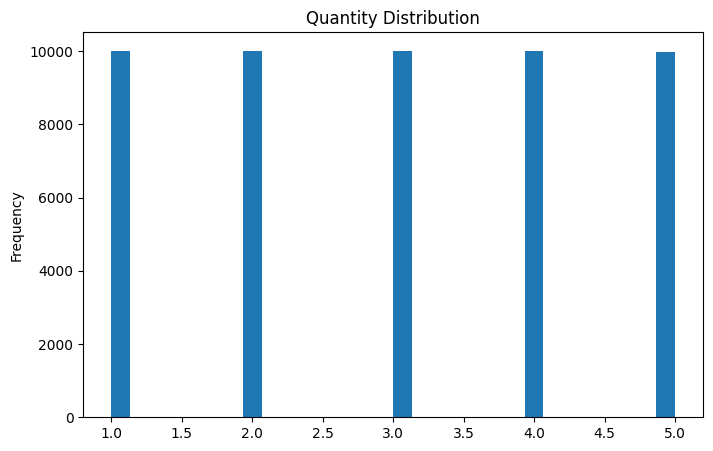

count    50000.000000
mean         2.998400
std          1.413703
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Quantity, dtype: float64

In [15]:

df['Quantity'].plot(kind='hist', bins=30)
plt.title("Quantity Distribution")
plt.show()

df['Quantity'].describe()



### Insight:
Helps understand purchasing volume patterns per transaction.


## 1️⃣3️⃣ Payment Method Analysis

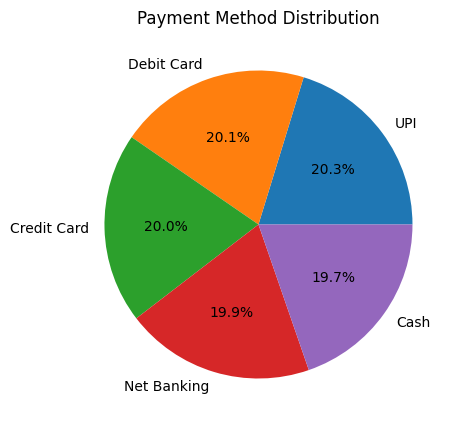

PaymentMethod
UPI            10129
Debit Card     10073
Credit Card    10013
Net Banking     9936
Cash            9849
Name: count, dtype: int64

In [16]:

payment_counts = df['PaymentMethod'].value_counts()
payment_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

payment_counts



### Insight:
Shows preferred payment channels among customers.


## 1️⃣4️⃣ Customer Revenue Distribution

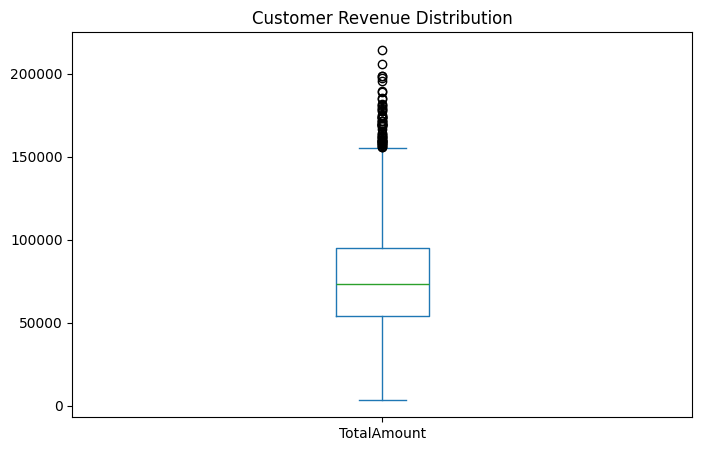

count      5000.000000
mean      75903.184440
std       30700.831524
min        3461.920000
25%       54182.817500
50%       73229.900000
75%       94676.592500
max      214361.330000
Name: TotalAmount, dtype: float64

In [17]:

customer_rev = df.groupby('CustomerID')['TotalAmount'].sum()

customer_rev.plot(kind='box')
plt.title("Customer Revenue Distribution")
plt.show()

customer_rev.describe()



### Insight:
Identifies revenue outliers and high-value customers.



# Final Business Insights

- Revenue trends reveal business growth patterns.
- Certain product categories dominate revenue contribution.
- Revenue is often concentrated among top customers.
- Most customers purchase infrequently.
- Payment preferences can guide strategic channel optimization.

This analysis forms the foundation for building an interactive business dashboard.
